# Data Loading and Previewing



In [1]:
import pandas as pd

rawData = pd.read_csv('https://raw.githubusercontent.com/skduong/anuran-calls/master/Frogs_MFCCs.csv')
rawData

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  ...      Genus         Species  RecordID
0          1.0  0.152936 -0.105586  ...  Adenomera  AdenomeraAndre         1
1          1.0  0.171534 -0.098975  ...  Adenomera  AdenomeraAndre         1
2          1.0  0.152317 -0.082973  ...  Adenomera  AdenomeraAndre         1
3          1.0  0.224392  0.118985  ...  Adenomera  AdenomeraAndre         1
4          1.0  0.087817 -0.068345  ...  Adenomera  AdenomeraAndre         1
...        ...       ...       ...  ...        ...             ...       ...
7190       1.0 -0.554504 -0.337717  ...     Scinax     ScinaxRuber        60
7191       1.0 -0.517273 -0.370574  ...     Scinax     ScinaxRuber        60
7192       1.0 -0.582557 -0.343237  ...     Scinax     ScinaxRuber        60
7193       1.0 -0.519497 -0.307553  ...     Scinax     ScinaxRuber        60
7194       1.0 -0.508833 -0.324106  ...     Scinax     ScinaxRuber        60

[7195 rows x 26 columns]

In [2]:
data = rawData[rawData.columns[:23]] #focus on Family classification
data

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  ...  MFCCs_21  MFCCs_22           Family
0          1.0  0.152936 -0.105586  ...  0.118680  0.014038  Leptodactylidae
1          1.0  0.171534 -0.098975  ...  0.082263  0.029056  Leptodactylidae
2          1.0  0.152317 -0.082973  ...  0.099108  0.077162  Leptodactylidae
3          1.0  0.224392  0.118985  ... -0.018691  0.023954  Leptodactylidae
4          1.0  0.087817 -0.068345  ...  0.108610  0.079244  Leptodactylidae
...        ...       ...       ...  ...       ...       ...              ...
7190       1.0 -0.554504 -0.337717  ... -0.021860 -0.079860          Hylidae
7191       1.0 -0.517273 -0.370574  ... -0.015418 -0.101892          Hylidae
7192       1.0 -0.582557 -0.343237  ... -0.000531 -0.080425          Hylidae
7193       1.0 -0.519497 -0.307553  ... -0.027911 -0.096895          Hylidae
7194       1.0 -0.508833 -0.324106  ... -0.029355 -0.087910          Hylidae

[7195 rows x 23 columns]

In [3]:
data['Family'].value_counts() #get class balance

Leptodactylidae    4420
Hylidae            2165
Dendrobatidae       542
Bufonidae            68
Name: Family, dtype: int64

#Evaluating Feature Discriminating Power 

To see if any of the MFCCs have more influence on class decision, the discriminating power for each feature, F, between disjoint classes CLi and CLj (with combined size N) will be calculated using:

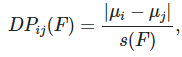   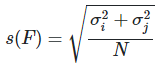



In [ ]:
def DP(i, j): #take 2 classes, give discriminating power between them for all 22 features
  i = i.drop(['Family'],1); j = j.drop(['Family'],1)
  N = len(i)+len(j)
  sF = ((i.var()+j.var())/N)**0.5
  DP = abs(i.mean()-j.mean())/sF
  return DP.sort_values(0,False)

ld = DP(lepto, dendro)
dh = DP(dendro, hyli)
lh = DP(lepto, hyli)

print('Top 3 descriminating features for each pair of classes: \n', 'Lepto & Dendro:\n', ld.iloc[0:3], '\n\nDendro & Hyli:\n',dh.iloc[0:3], '\n\nLepto & Hyli:\n', lh.iloc[0:3], sep='')

Top 3 descriminating features for each pair of classes: 
Lepto & Dendro:
MFCCs_17    156.642078
MFCCs_15    117.321550
MFCCs_19    113.492035
dtype: float64

Dendro & Hyli:
MFCCs_ 3    90.682019
MFCCs_14    77.361347
MFCCs_16    73.054011
dtype: float64

Lepto & Hyli:
MFCCs_19    89.183670
MFCCs_22    86.072518
MFCCs_17    71.696875
dtype: float64


It appears that MFCCs 17 and 19 are the most influential in distinguishing Leptodactylidae frogs from the other 2. 

(array([1.000e+00, 5.000e+00, 5.800e+01, 6.440e+02, 1.287e+03, 1.420e+02,
        2.400e+01, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([-0.38965599, -0.2932695 , -0.196883  , -0.1004965 , -0.00411001,
         0.09227649,  0.18866299,  0.28504948,  0.38143598,  0.47782248,
         0.57420897]),
 <a list of 10 Patch objects>)

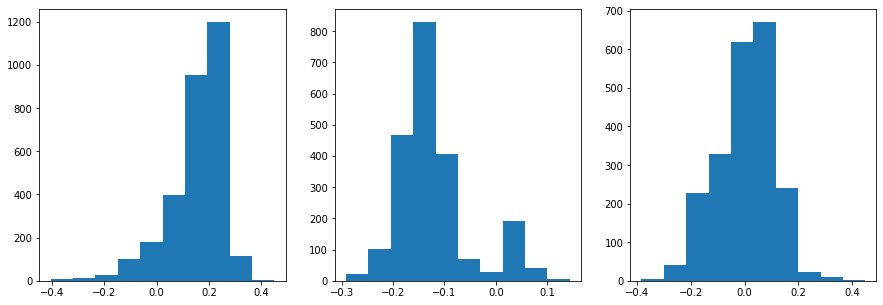

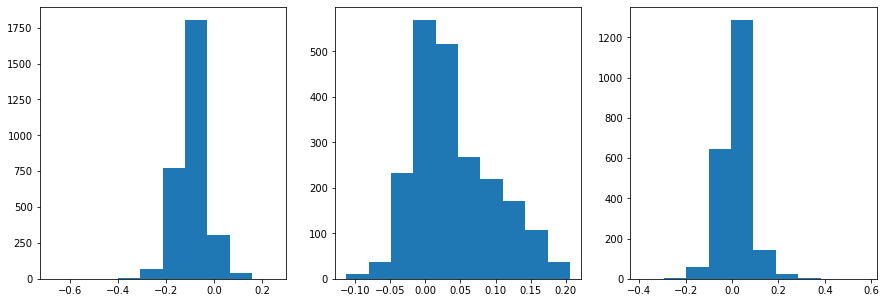

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axes[0].hist(lepto['MFCCs_17'])
axes[1].hist(dendro['MFCCs_17'])
axes[2].hist(hyli['MFCCs_17'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axes[0].hist(lepto['MFCCs_19'])
axes[1].hist(dendro['MFCCs_19'])
axes[2].hist(hyli['MFCCs_19'])

We can visually see why MFCCs 17 (top) & 19 (bottom) have such a high discriminating power. For each class, these values take on a distinct range (eg. MFCC17 is mostly positive for Leptodactylidae, negative for Dendrobatidae, and very close to zero for Hylidae). 

# EDA

In [4]:
features = data[data.columns[:-1]]
labels = data['Family']

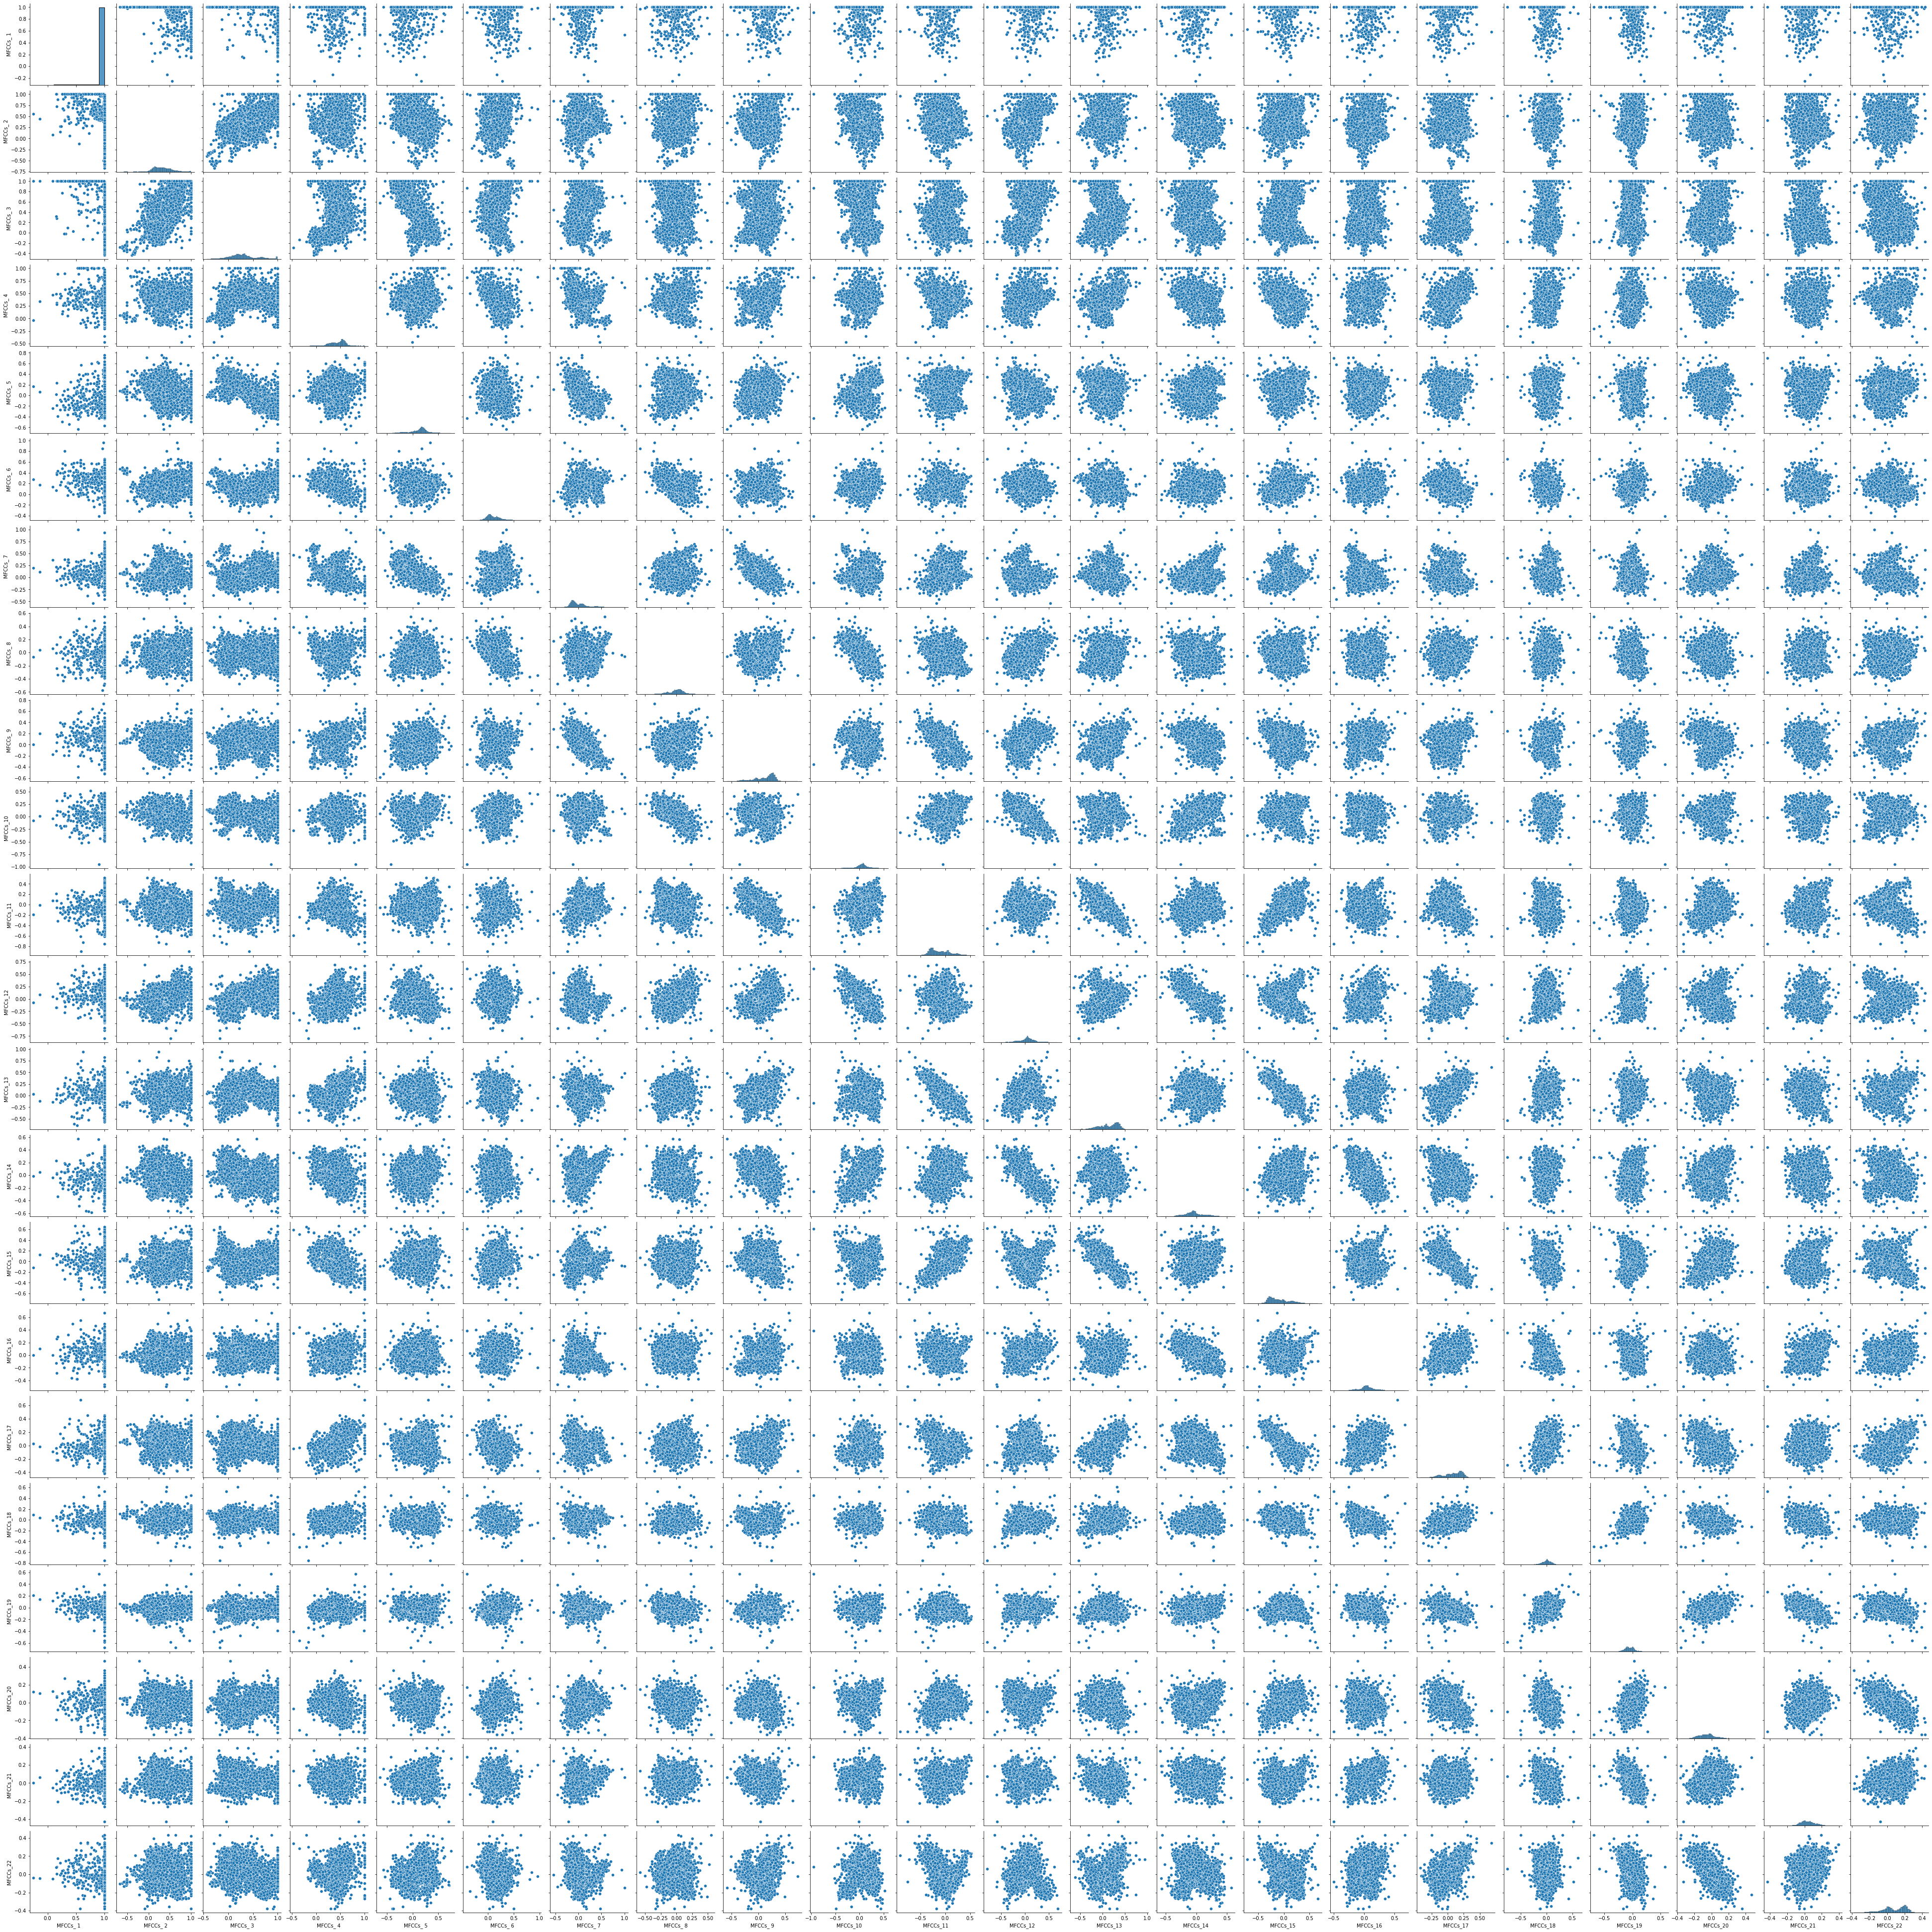

In [5]:
import seaborn as sns

sns.pairplot(features)

# PCA
There is a bit of correlation present between certin MFCCs, and 22 features is overall a lot to look at.

PCA will be performed to reduce dimension and limit redundancy

In [6]:
from sklearn.decomposition import PCA

#standardize features
sfeatures = features.apply(lambda x: (x-x.mean())/x.std()) 

pca = PCA(0.95) #want at least 95% PVE
principalComponents = pca.fit(sfeatures)
principalComponents = pca.fit_transform(sfeatures)
colNames = []
for i in range(1, principalComponents.shape[1]+1):
    colNames.append('principal component' + str(i))
    
pcaFeatures = pd.DataFrame(data = principalComponents, columns = colNames)
pcaFeatures

principal component1  ...  principal component12
0                -3.712698  ...              -0.535894
1                -3.724291  ...              -0.480881
2                -3.140530  ...              -0.260010
3                -3.532723  ...               0.288591
4                -3.280363  ...               0.107823
...                    ...  ...                    ...
7190             -3.074532  ...               1.408020
7191             -2.919019  ...               1.384507
7192             -2.671477  ...               1.583933
7193             -3.004050  ...               1.367838
7194             -2.857650  ...               1.433558

[7195 rows x 12 columns]

In [7]:
data = pd.concat([pcaFeatures, labels], 1)
data

principal component1  ...           Family
0                -3.712698  ...  Leptodactylidae
1                -3.724291  ...  Leptodactylidae
2                -3.140530  ...  Leptodactylidae
3                -3.532723  ...  Leptodactylidae
4                -3.280363  ...  Leptodactylidae
...                    ...  ...              ...
7190             -3.074532  ...          Hylidae
7191             -2.919019  ...          Hylidae
7192             -2.671477  ...          Hylidae
7193             -3.004050  ...          Hylidae
7194             -2.857650  ...          Hylidae

[7195 rows x 13 columns]

In [8]:
lepto = data.loc[data['Family'] == 'Leptodactylidae']
dendro = data.loc[data['Family'] == 'Dendrobatidae']
hyli = data.loc[data['Family'] == 'Hylidae']

features = data[data.columns[:-1]].reset_index(drop=True)
labels = data['Family'].reset_index(drop=True)
data.describe()

principal component1  ...  principal component12
count          7.195000e+03  ...           7.195000e+03
mean          -2.845874e-15  ...          -4.548905e-17
std            2.767136e+00  ...           5.322241e-01
min           -7.343947e+00  ...          -3.730729e+00
25%           -2.566770e+00  ...          -3.323841e-01
50%           -1.723268e-01  ...          -9.030535e-03
75%            2.648205e+00  ...           2.942369e-01
max            7.491325e+00  ...           4.751085e+00

[8 rows x 12 columns]

# Spliting and Rebalancing

- 20% Test/ 80% Training Split by each class
- Then rebalance them

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split

lepto = data.loc[data['Family'] == 'Leptodactylidae']
hyli = data.loc[data['Family'] == 'Hylidae']
dendro = data.loc[data['Family'] == 'Dendrobatidae']

X_train = []; X_test= []
y_train = []; y_test = []
fams = ['Leptodactylidae', 'Hylidae', 'Dendrobatidae']

for i in [lepto, hyli, dendro]:
  xtrain, xtest, ytrain, ytest = train_test_split(i[i.columns[:-1]], i[i.columns[-1]], test_size=0.2)
  X_train.append(xtrain); X_test.append(xtest)
  y_train.append(ytrain); y_test.append(ytest)

print("Training Sizes: ")
for i in range(3):
  print (fams[i], len(X_train[i]))
print("\n\nTesting Sizes: ")
for i in range(3):
  print (fams[i], len(X_test[i]))


Training Sizes: 
Leptodactylidae 3536
Hylidae 1732
Dendrobatidae 433


Testing Sizes: 
Leptodactylidae 884
Hylidae 433
Dendrobatidae 109


Rebalancing is needed: undersample Leptodactylidae, oversamle Dendrobatidae with SMOTE, remove Bufondidae

In [10]:
train_subset_X = pd.concat([X_train[1], X_train[2]]) #SMOTE dendro to hyli's size
train_subset_y = pd.concat([y_train[1], y_train[2]])
train_lepto = pd.concat([X_train[0], y_train[0]], 1) #undersample lepto

test_subset_X = pd.concat([X_test[1], X_test[2]])
test_subset_y = pd.concat([y_test[1], y_test[2]])
test_lepto = pd.concat([X_test[0], y_test[0]], 1)


In [14]:
from imblearn.over_sampling import SMOTE

#Training set rebalancing
X = train_subset_X
y = train_subset_y
oversample = SMOTE()
X, y = oversample.fit_resample(X, y) #X = data matrix, y = labels for hyli and lepto
oversample_df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], 1)
oversample_df.columns = data.columns.values
undersample = train_lepto.drop(np.random.choice(train_lepto.index, int(1420*0.8), False))

X_train_df = pd.concat([oversample_df[oversample_df.columns[:-1]], undersample[undersample.columns[:-1]]])
y_train_df = pd.concat([oversample_df[oversample_df.columns[-1]], undersample[undersample.columns[-1]]])

print("Final Training Set:")
pd.concat([X_train_df, y_train_df], axis = 1)

Final Training Set:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


principal component1  ...           Family
0                -1.775351  ...          Hylidae
1                -1.655457  ...          Hylidae
2                -1.932950  ...          Hylidae
3                -1.870238  ...          Hylidae
4                -0.779013  ...          Hylidae
...                    ...  ...              ...
558              -3.790708  ...  Leptodactylidae
627              -3.694021  ...  Leptodactylidae
4516              3.219819  ...  Leptodactylidae
2210              1.861142  ...  Leptodactylidae
3887              2.313525  ...  Leptodactylidae

[5864 rows x 13 columns]

In [16]:
#Test set rebalancing
X = test_subset_X
y = test_subset_y
oversample = SMOTE()
X, y = oversample.fit_resample(X, y) #X = data matrix, y = labels for hyli and lepto
oversample_df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], 1)
oversample_df.columns = data.columns.values
undersample = test_lepto.drop(np.random.choice(test_lepto.index, int(1420*0.2), False))

X_test_df = pd.concat([oversample_df[oversample_df.columns[:-1]], undersample[undersample.columns[:-1]]])
y_test_df = pd.concat([oversample_df[oversample_df.columns[-1]], undersample[undersample.columns[-1]]])

print("Final Test Set:")
pd.concat([X_test_df, y_test_df], axis=1)

Final Test Set:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


principal component1  ...           Family
0                -5.219729  ...          Hylidae
1                -1.419250  ...          Hylidae
2                -0.167117  ...          Hylidae
3                -1.497044  ...          Hylidae
4                -3.377121  ...          Hylidae
...                    ...  ...              ...
2553              2.809642  ...  Leptodactylidae
1853              3.384590  ...  Leptodactylidae
4566              3.697973  ...  Leptodactylidae
521              -3.517673  ...  Leptodactylidae
6                -2.918160  ...  Leptodactylidae

[1466 rows x 13 columns]

In [33]:
data_rebalanced = pd.concat([pd.concat([X_test_df, y_test_df], axis=1), pd.concat([X_train_df, y_train_df], axis = 1)], ignore_index=True)
# Check new balance
print("Training Sizes:")
for n, i in enumerate([sum(y_train_df == 'Leptodactylidae'), sum(y_train_df == 'Hylidae'), sum(y_train_df == 'Dendrobatidae')]):
  print(fams[n], i)

print("\nTest Sizes:")
for n, i in enumerate([sum(y_test_df == 'Leptodactylidae'), sum(y_test_df == 'Hylidae'), sum(y_test_df == 'Dendrobatidae')]):
  print(fams[n], i)

Training Sizes:
Leptodactylidae 2400
Hylidae 1732
Dendrobatidae 1732

Test Sizes:
Leptodactylidae 600
Hylidae 433
Dendrobatidae 433


Improved balanced compared to before. Not perfect, but it's a compromise between losing too many Leptodactylidae cases and having heavy imbalance with the major class.

#KNN

Training KNN model

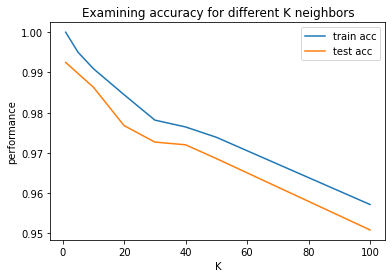

In [19]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#evaluating performance of different sized K neighbors; start with a broad range to get a general idea
K_test = [1,5,10,20,30,40,50,100]
K_acc_train = []; K_acc_test = []

for k in K_test:
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train_df, y_train_df)
  K_acc_train.append(sum(knn_model.predict(X_train_df) == y_train_df)/len(y_train_df))
  K_acc_test.append(sum(knn_model.predict(X_test_df) == y_test_df)/len(y_test_df))

plt.plot(K_test, K_acc_train, label = "train acc") 
plt.plot(K_test, K_acc_test, label = "test acc")
# set axis labels
plt.xlabel('K')
plt.ylabel('performance')
# Set a title of the current axes.
plt.title('Examining accuracy for different K neighbors')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

A closer look at K from 1 to 20

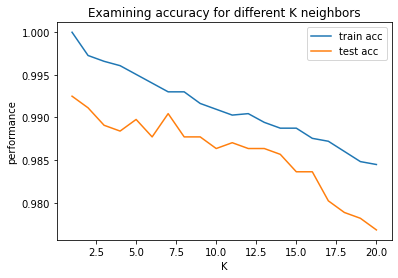

In [21]:
K_test = range(1,21)
K_acc_train = []; K_acc_test = []

for k in K_test:
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train_df, y_train_df)
  K_acc_train.append(sum(knn_model.predict(X_train_df) == y_train_df)/len(y_train_df))
  K_acc_test.append(sum(knn_model.predict(X_test_df) == y_test_df)/len(y_test_df))

plt.plot(K_test, K_acc_train, label = "train acc") 
plt.plot(K_test, K_acc_test, label = "test acc")
# set axis labels
plt.xlabel('K')
plt.ylabel('performance')
# Set a title of the current axes.
plt.title('Examining accuracy for different K neighbors')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

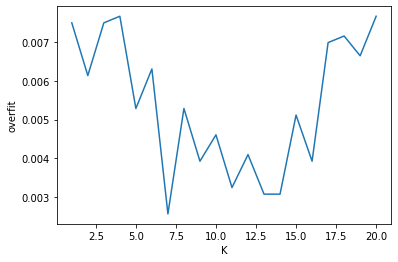

In [22]:
overfit = abs(np.array(K_acc_train) - np.array(K_acc_test))
plt.plot(K_test, overfit) 
plt.xlabel('K'); plt.ylabel('overfit')
plt.show()

K=7 seems decent

## Train Performance

In [23]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_df, y_train_df)
pred_train = knn_model.predict(X_train_df)

In [24]:
#Accuracy
from sklearn.metrics import confusion_matrix

#test conf matrix
confusion_matrix(y_train_df, pred_train)
pd.crosstab(y_train_df, pred_train, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted        Dendrobatidae  Hylidae  Leptodactylidae   All
Actual                                                        
Dendrobatidae             1732        0                0  1732
Hylidae                      4     1707               21  1732
Leptodactylidae              1       15             2384  2400
All                       1737     1722             2405  5864

In [25]:
#in percentages
print("Global Accuracy: ", sum(y_train_df == pred_train)/ len(y_train_df))
conf = pd.crosstab(y_train_df, pred_train, rownames = ['Actual'], colnames =['Predicted'])
conf.divide(conf.sum(axis=1), axis=0)

Global Accuracy:  0.9930081855388813


Predicted        Dendrobatidae   Hylidae  Leptodactylidae
Actual                                                   
Dendrobatidae         1.000000  0.000000         0.000000
Hylidae               0.002309  0.985566         0.012125
Leptodactylidae       0.000417  0.006250         0.993333

In [26]:
#Precision, Recall, F1 scores
from sklearn.metrics import classification_report

pred_test = knn_model.predict(X_train_df)
print(classification_report(y_train_df, pred_train))

                 precision    recall  f1-score   support

  Dendrobatidae       1.00      1.00      1.00      1732
        Hylidae       0.99      0.99      0.99      1732
Leptodactylidae       0.99      0.99      0.99      2400

       accuracy                           0.99      5864
      macro avg       0.99      0.99      0.99      5864
   weighted avg       0.99      0.99      0.99      5864



## Predictions

In [27]:
pred_test = knn_model.predict(X_test_df)

In [28]:
#Accuracy
confusion_matrix(y_test_df, pred_test)
pd.crosstab(y_test_df, pred_test, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted        Dendrobatidae  Hylidae  Leptodactylidae   All
Actual                                                        
Dendrobatidae              432        1                0   433
Hylidae                      3      424                6   433
Leptodactylidae              0        4              596   600
All                        435      429              602  1466

In [29]:
#in percentages
print("Global Accuracy: ", sum(y_test_df == pred_test)/ len(y_test_df))
conf = pd.crosstab(y_test_df, pred_test, rownames = ['Actual'], colnames =['Predicted'])
conf.divide(conf.sum(axis=1), axis=0)

Global Accuracy:  0.990450204638472


Predicted        Dendrobatidae   Hylidae  Leptodactylidae
Actual                                                   
Dendrobatidae         0.997691  0.002309         0.000000
Hylidae               0.006928  0.979215         0.013857
Leptodactylidae       0.000000  0.006667         0.993333

In [30]:
knn_model.score(X_test_df, y_test_df)

0.990450204638472

In [31]:
#Precision, Recall, F1 scores
pred_test = knn_model.predict(X_test_df)
print(classification_report(y_test_df, pred_test))

                 precision    recall  f1-score   support

  Dendrobatidae       0.99      1.00      1.00       433
        Hylidae       0.99      0.98      0.98       433
Leptodactylidae       0.99      0.99      0.99       600

       accuracy                           0.99      1466
      macro avg       0.99      0.99      0.99      1466
   weighted avg       0.99      0.99      0.99      1466



## GridSearchCV to better generalize size of K-neighbors

In [38]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(data[data.columns[:-1]], data[data.columns[-1]])
knn_gscv.best_params_

{'n_neighbors': 7}

## Check Generalization with Cross-Validation

In [39]:
from sklearn.model_selection import cross_val_score

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, pcaFeatures, labels, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.51007644 0.97706741 0.97845726 0.99444058 0.77831828]
cv_scores mean:0.8476719944405838
